In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
# show all columns in the dataframe

pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv("bellingcat_final_data.csv")
df.head()

,filename,duration,transcription,id,wpm,wp30,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId
0,bellingcat-tool/amazonfinds/media/735665769517...,13,Let's do this.,7356657695170006278,13.846154,6.923077,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 258, 'followerCount': 17500, 'fo...",1712855349,Sad hamster plush toy 🥺🎀 Link in bio🥺 #sadhams...,False,"{'collectCount': 127800, 'commentCount': 9164,...","{'collectCount': '127750', 'commentCount': '91...",127800.0,9164.0,258.0,8900000.0,289000.0,17500.0,0.0,1700000.0,1700000.0,161.0,plushy_town,🎀HAMPTER PLUSH🎀,7346295827809813509
1,bellingcat-tool/amazonfinds/media/696346498578...,16,Nobody's gonna know. Nobody's gonna know. The...,6963464985787813126,60.000000,30.000000,{'avatarLarger': 'https://p16-pu-sign-useast8....,"{'diggCount': 64100, 'followerCount': 4400000,...",1621308040,lmaoo how would they know? book case with key ...,False,"{'collectCount': 84600, 'commentCount': 7568, ...","{'collectCount': '84550', 'commentCount': '756...",84600.0,7568.0,64100.0,10300000.0,22200.0,4400000.0,0.0,205500000.0,205500000.0,630.0,heartdefensor,Heart Defensor,55842125203939328
2,bellingcat-tool/amazonfinds/media/736366566699...,0,Gone don't leave soranchise geo whole,7363665666995539206,NaN,NaN,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 10, 'followerCount': 40500, 'fol...",1714487020,Best amazon finds for your room #amazonmusthav...,False,"{'collectCount': 262100, 'commentCount': 977, ...","{'collectCount': '262102', 'commentCount': '97...",262100.0,977.0,10.0,4300000.0,29900.0,40500.0,0.0,800100.0,800100.0,9.0,findsforwomen,DHGate Finds,7360194839546151941
3,bellingcat-tool/amazonfinds/media/690437904749...,15,This is to all the moms out there because obv...,6904379047493504262,152.000000,76.000000,{'avatarLarger': 'https://p16-sign.tiktokcdn-u...,"{'diggCount': 14800, 'followerCount': 78300, '...",1607551039,🦷 #fyp #babyteeth #toothbox #toothfairy #momha...,False,"{'collectCount': 95700, 'commentCount': 4888, ...","{'collectCount': '95682', 'commentCount': '488...",95700.0,4888.0,14800.0,8100000.0,20900.0,78300.0,0.0,2900000.0,2900000.0,148.0,jjeennni,jjeennni,6734109397343192070
4,bellingcat-tool/amazonfinds/media/688435049373...,30,Random things on Amazon that just make sense....,6884350493737405701,212.000000,106.000000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 30100, 'followerCount': 174200, ...",1602887793,For all my WFH friends ✨ #flexispot #flexispot...,False,"{'collectCount': 203600, 'commentCount': 8349,...","{'collectCount': '203555', 'commentCount': '83...",203600.0,8349.0,30100.0,16300000.0,185600.0,174200.0,0.0,9900000.0,9900000.0,400.0,treyfoundjules,treyfoundjules,6763957568730940422


In [27]:
df['wpm'].mean()

140.60598296431505

In [7]:
%%R -i df

df <- df

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = playCount ~ wpm, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-12866489  -6983145  -3578938   1777173 142867879 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16049593     772429  20.778  < 2e-16 ***
wpm           -18467       4363  -4.233 2.55e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13910000 on 876 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.02004,	Adjusted R-squared:  0.01892 
F-statistic: 17.92 on 1 and 876 DF,  p-value: 2.552e-05



In addition: Warning messages:
1: Removed 30 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 30 rows containing missing values or values outside the scale range
(`geom_point()`). 


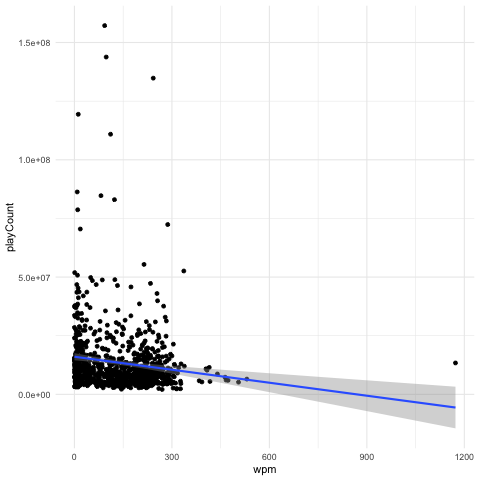

In [8]:
%%R

plt <- ggplot(df, aes(x=wpm, y=playCount)) + geom_point() + geom_smooth(method = 'lm') + theme_minimal()
print(plt)

model <- lm(playCount ~ wpm, data=df)
summary(model)

In [28]:
df[df['wpm'] > 900]

,filename,duration,transcription,id,wpm,wp30,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId
496,bellingcat-tool/amazonfinds/media/720058113728...,33,I find myself in a shit position The man that...,7200581137289481518,1172.727273,586.363636,{'avatarLarger': 'https://p16-pu-sign-useast8....,"{'diggCount': 96200, 'followerCount': 518400, ...",1676515955,Replying to @amandaborovies always wanted a w...,False,"{'collectCount': 108700, 'commentCount': 1004,...","{'collectCount': '108694', 'commentCount': '10...",108700.0,1004.0,96200.0,13400000.0,12600.0,518400.0,0.0,21800000.0,21800000.0,945.0,miks_tiks,Mikayla,6750114495177327621


In [9]:
%%R

model <- lm(playCount ~ wpm + commentCount + shareCount + followerCount, data=df)
summary(model)


Call:
lm(formula = playCount ~ wpm + commentCount + shareCount + followerCount, 
    data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-39164657  -4844418  -1932374   2011476 128473875 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.445e+06  7.471e+05  12.642   <2e-16 ***
wpm           -1.167e+04  3.591e+03  -3.249   0.0012 ** 
commentCount   5.421e+02  5.222e+01  10.383   <2e-16 ***
shareCount     4.322e+01  4.592e+00   9.412   <2e-16 ***
followerCount  5.604e-02  1.187e-01   0.472   0.6368    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11370000 on 873 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.347,	Adjusted R-squared:  0.344 
F-statistic:   116 on 4 and 873 DF,  p-value: < 2.2e-16



In [10]:
%%R

model <- lm(playCount ~ wp30 + commentCount + shareCount + followerCount + duration, data=df)
summary(model)


Call:
lm(formula = playCount ~ wp30 + commentCount + shareCount + followerCount + 
    duration, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-39180437  -4842538  -1944957   2004463 128478312 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.418e+06  8.392e+05  11.223  < 2e-16 ***
wp30          -2.336e+04  7.198e+03  -3.246  0.00122 ** 
commentCount   5.420e+02  5.231e+01  10.361  < 2e-16 ***
shareCount     4.324e+01  4.599e+00   9.401  < 2e-16 ***
followerCount  5.544e-02  1.190e-01   0.466  0.64151    
duration       8.673e+02  1.235e+04   0.070  0.94401    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11380000 on 872 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.347,	Adjusted R-squared:  0.3432 
F-statistic: 92.67 on 5 and 872 DF,  p-value: < 2.2e-16



# filter out video with 0 words

In [29]:
df.head()

,filename,duration,transcription,id,wpm,wp30,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId
0,bellingcat-tool/amazonfinds/media/735665769517...,13,Let's do this.,7356657695170006278,13.846154,6.923077,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 258, 'followerCount': 17500, 'fo...",1712855349,Sad hamster plush toy 🥺🎀 Link in bio🥺 #sadhams...,False,"{'collectCount': 127800, 'commentCount': 9164,...","{'collectCount': '127750', 'commentCount': '91...",127800.0,9164.0,258.0,8900000.0,289000.0,17500.0,0.0,1700000.0,1700000.0,161.0,plushy_town,🎀HAMPTER PLUSH🎀,7346295827809813509
1,bellingcat-tool/amazonfinds/media/696346498578...,16,Nobody's gonna know. Nobody's gonna know. The...,6963464985787813126,60.000000,30.000000,{'avatarLarger': 'https://p16-pu-sign-useast8....,"{'diggCount': 64100, 'followerCount': 4400000,...",1621308040,lmaoo how would they know? book case with key ...,False,"{'collectCount': 84600, 'commentCount': 7568, ...","{'collectCount': '84550', 'commentCount': '756...",84600.0,7568.0,64100.0,10300000.0,22200.0,4400000.0,0.0,205500000.0,205500000.0,630.0,heartdefensor,Heart Defensor,55842125203939328
2,bellingcat-tool/amazonfinds/media/736366566699...,0,Gone don't leave soranchise geo whole,7363665666995539206,NaN,NaN,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 10, 'followerCount': 40500, 'fol...",1714487020,Best amazon finds for your room #amazonmusthav...,False,"{'collectCount': 262100, 'commentCount': 977, ...","{'collectCount': '262102', 'commentCount': '97...",262100.0,977.0,10.0,4300000.0,29900.0,40500.0,0.0,800100.0,800100.0,9.0,findsforwomen,DHGate Finds,7360194839546151941
3,bellingcat-tool/amazonfinds/media/690437904749...,15,This is to all the moms out there because obv...,6904379047493504262,152.000000,76.000000,{'avatarLarger': 'https://p16-sign.tiktokcdn-u...,"{'diggCount': 14800, 'followerCount': 78300, '...",1607551039,🦷 #fyp #babyteeth #toothbox #toothfairy #momha...,False,"{'collectCount': 95700, 'commentCount': 4888, ...","{'collectCount': '95682', 'commentCount': '488...",95700.0,4888.0,14800.0,8100000.0,20900.0,78300.0,0.0,2900000.0,2900000.0,148.0,jjeennni,jjeennni,6734109397343192070
4,bellingcat-tool/amazonfinds/media/688435049373...,30,Random things on Amazon that just make sense....,6884350493737405701,212.000000,106.000000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 30100, 'followerCount': 174200, ...",1602887793,For all my WFH friends ✨ #flexispot #flexispot...,False,"{'collectCount': 203600, 'commentCount': 8349,...","{'collectCount': '203555', 'commentCount': '83...",203600.0,8349.0,30100.0,16300000.0,185600.0,174200.0,0.0,9900000.0,9900000.0,400.0,treyfoundjules,treyfoundjules,6763957568730940422


In [33]:
type(df['transcription'][0])

str

In [35]:
df['wordCount'] = df['transcription'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)

In [36]:
df.head()

,filename,duration,transcription,id,wpm,wp30,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId,wordCount
0,bellingcat-tool/amazonfinds/media/735665769517...,13,Let's do this.,7356657695170006278,13.846154,6.923077,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 258, 'followerCount': 17500, 'fo...",1712855349,Sad hamster plush toy 🥺🎀 Link in bio🥺 #sadhams...,False,"{'collectCount': 127800, 'commentCount': 9164,...","{'collectCount': '127750', 'commentCount': '91...",127800.0,9164.0,258.0,8900000.0,289000.0,17500.0,0.0,1700000.0,1700000.0,161.0,plushy_town,🎀HAMPTER PLUSH🎀,7346295827809813509,3
1,bellingcat-tool/amazonfinds/media/696346498578...,16,Nobody's gonna know. Nobody's gonna know. The...,6963464985787813126,60.000000,30.000000,{'avatarLarger': 'https://p16-pu-sign-useast8....,"{'diggCount': 64100, 'followerCount': 4400000,...",1621308040,lmaoo how would they know? book case with key ...,False,"{'collectCount': 84600, 'commentCount': 7568, ...","{'collectCount': '84550', 'commentCount': '756...",84600.0,7568.0,64100.0,10300000.0,22200.0,4400000.0,0.0,205500000.0,205500000.0,630.0,heartdefensor,Heart Defensor,55842125203939328,16
2,bellingcat-tool/amazonfinds/media/736366566699...,0,Gone don't leave soranchise geo whole,7363665666995539206,NaN,NaN,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 10, 'followerCount': 40500, 'fol...",1714487020,Best amazon finds for your room #amazonmusthav...,False,"{'collectCount': 262100, 'commentCount': 977, ...","{'collectCount': '262102', 'commentCount': '97...",262100.0,977.0,10.0,4300000.0,29900.0,40500.0,0.0,800100.0,800100.0,9.0,findsforwomen,DHGate Finds,7360194839546151941,6
3,bellingcat-tool/amazonfinds/media/690437904749...,15,This is to all the moms out there because obv...,6904379047493504262,152.000000,76.000000,{'avatarLarger': 'https://p16-sign.tiktokcdn-u...,"{'diggCount': 14800, 'followerCount': 78300, '...",1607551039,🦷 #fyp #babyteeth #toothbox #toothfairy #momha...,False,"{'collectCount': 95700, 'commentCount': 4888, ...","{'collectCount': '95682', 'commentCount': '488...",95700.0,4888.0,14800.0,8100000.0,20900.0,78300.0,0.0,2900000.0,2900000.0,148.0,jjeennni,jjeennni,6734109397343192070,38
4,bellingcat-tool/amazonfinds/media/688435049373...,30,Random things on Amazon that just make sense....,6884350493737405701,212.000000,106.000000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 30100, 'followerCount': 174200, ...",1602887793,For all my WFH friends ✨ #flexispot #flexispot...,False,"{'collectCount': 203600, 'commentCount': 8349,...","{'collectCount': '203555', 'commentCount': '83...",203600.0,8349.0,30100.0,16300000.0,185600.0,174200.0,0.0,9900000.0,9900000.0,400.0,treyfoundjules,treyfoundjules,6763957568730940422,106


<Axes: >

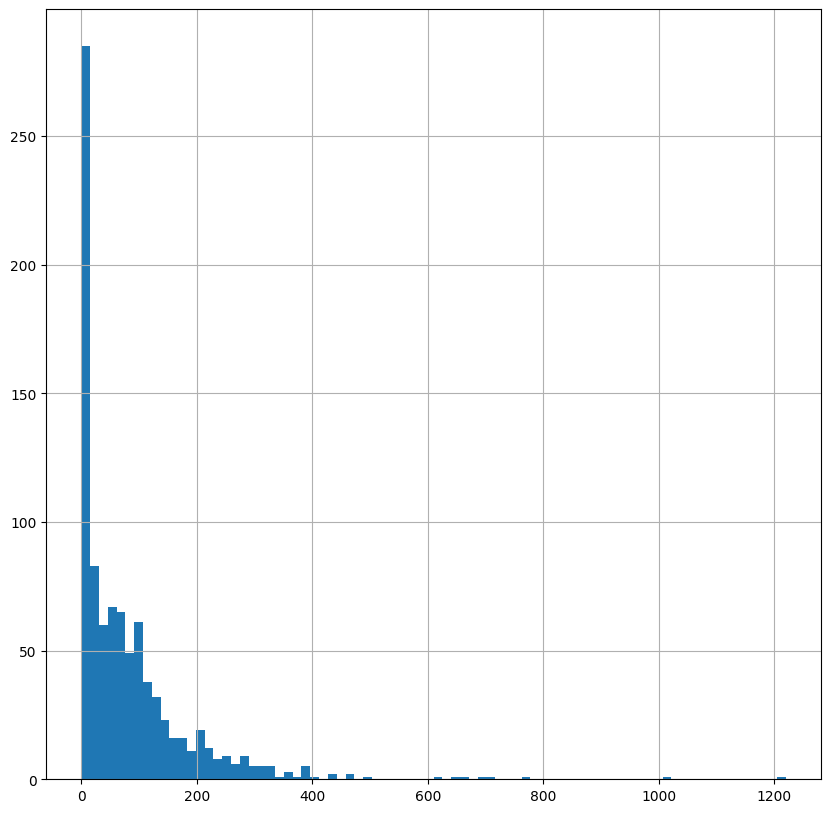

In [41]:
df['wordCount'].hist(figsize=(10, 10), bins=80)

In [53]:
#count wordCount == 0
df[df['wordCount'] == 8]

,filename,duration,transcription,id,wpm,wp30,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId,wordCount
51,bellingcat-tool/amazonfinds/media/712292220766...,42,Music Let me do you like a-a-a-a-a-a-a-a-a-a-a...,7122922207663361326,11.428571,5.714286,{'avatarLarger': 'https://p19-pu-sign-useast8....,"{'diggCount': 13300, 'followerCount': 14700000...",1658434567,that girl car finds🕊✨🤍 #fyp #foryoupage #aesth...,False,"{'collectCount': 56100, 'commentCount': 1529, ...","{'collectCount': '56144', 'commentCount': '152...",56100.0,1529.0,13300.0,5500000.0,2882.0,14700000.0,0.0,623500000.0,623500000.0,1213.0,kaelimaee,kaeli mae,6776020666518717445,8
65,bellingcat-tool/amazonfinds/media/707835917796...,9,"I don't know about y'all, but this ship...",7078359177961377070,53.333333,26.666667,{'avatarLarger': 'https://p16-sign.tiktokcdn-u...,"{'diggCount': 8349, 'followerCount': 805100, '...",1648058925,#AMAZONFAVORITES #amazonfinds #amazon #amazonm...,False,"{'collectCount': 7959, 'commentCount': 1082, '...","{'collectCount': '7959', 'commentCount': '1082...",7959.0,1082.0,8349.0,6600000.0,19300.0,805100.0,0.0,20600000.0,20600000.0,1476.0,xoaprillmae,aprill dobrowski,6807895261433529349,8
116,bellingcat-tool/amazonfinds/media/719964369903...,53,Here's proof that it works without the music.,7199643699037375786,9.056604,4.528302,{'avatarLarger': 'https://p16-pu-sign-useast8....,"{'diggCount': 404, 'followerCount': 30800, 'fo...",1676297717,Replying to @ugabugaboo1 #tiktokmademebuyit #c...,True,"{'collectCount': 84800, 'commentCount': 2009, ...","{'collectCount': '84796', 'commentCount': '200...",84800.0,2009.0,404.0,8100000.0,24300.0,30800.0,0.0,924200.0,924200.0,142.0,revheadzofficials,RevHeadz,7193411452207989806,8
183,bellingcat-tool/amazonfinds/media/724486260661...,64,It's gonna be a confront! Thanks for watching.,7244862606618512666,7.500000,3.750000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 496, 'followerCount': 324200, 'f...",1686826039,#us #tiktok #amazonfinds #goodthing #fyp #foryou,False,"{'collectCount': 88800, 'commentCount': 9608, ...","{'collectCount': '88763', 'commentCount': '960...",88800.0,9608.0,496.0,25100000.0,14400.0,324200.0,0.0,3900000.0,3900000.0,601.0,cursh.23,Dipped,7200199267335160837,8
225,bellingcat-tool/amazonfinds/media/708645877205...,56,I'll see you guys in the next video.,7086458772054428974,8.571429,4.285714,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 42400, 'followerCount': 3800000,...",1649944759,Satisfying restock 🤩🤩 #asmr #fyp #organizedhom...,False,"{'collectCount': 26200, 'commentCount': 1876, ...","{'collectCount': '26194', 'commentCount': '187...",26200.0,1876.0,42400.0,18600000.0,3142.0,3800000.0,0.0,102600000.0,102600000.0,374.0,kandicebreinholt,Kandice Breinholt,6643523087714091013,8
289,bellingcat-tool/amazonfinds/media/696619538509...,6,This is your sign to buy prison glasses.,6966195385094262017,80.000000,40.000000,{'avatarLarger': 'https://p16-sign-sg.tiktokcd...,"{'diggCount': 10800, 'followerCount': 5194, 'f...",1621943763,Honestly the present I’ve ever gotten #justvib...,False,"{'collectCount': 43600, 'commentCount': 9736, ...","{'collectCount': '43601', 'commentCount': '973...",43600.0,9736.0,10800.0,4300000.0,13500.0,5194.0,0.0,3000000.0,3000000.0,233.0,jeruellexpiritu,Jeruell,6532285087940100097,8
326,bellingcat-tool/amazonfinds/media/730311084991...,0,"Oh God, she don't know what to learn",7303110849911196961,NaN,NaN,{'avatarLarger': 'https://p77-sign-va.tiktokcd...,"{'diggCount': 382, 'followerCount': 422700, 'f...",1700388008,Part 5 💫 | #fyp #amazonfinds #tiktokmademebuyi...,False,"{'collectCount': 127500, 'commentCount': 1938,...","{'collectCount': '127547', 'commentCount': '19...",127500.0,1938.0,382.0,5900000.0,2289.0,422700.0,0.0,11100000.0,11100000.0,351.0,jacobdamian,Jacob Damian 🎱,7171917494

In [54]:
#filter df to only include rows where wordCount > 7
df_2 = df[df['wordCount'] > 7]

In [55]:
%%R -i df_2

df_2 <- df_2

In [61]:
%%R

model <- lm(playCount ~ wp30 + commentCount + shareCount + followerCount + duration, data=df_2)
summary(model)


Call:
lm(formula = playCount ~ wp30 + commentCount + shareCount + followerCount + 
    duration, data = df_2)

Residuals:
      Min        1Q    Median        3Q       Max 
-47480279  -4267621  -1591869   2075219 128591700 

Coefficients:


                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.270e+06  1.106e+06   7.475 2.38e-13 ***
wp30          -1.706e+04  8.914e+03  -1.914    0.056 .  
commentCount   5.885e+02  6.104e+01   9.642  < 2e-16 ***
shareCount     4.849e+01  5.133e+00   9.446  < 2e-16 ***
followerCount  3.762e-02  1.339e-01   0.281    0.779    
duration      -5.090e+01  1.284e+04  -0.004    0.997    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11030000 on 682 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.4013,	Adjusted R-squared:  0.397 
F-statistic: 91.44 on 5 and 682 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = playCount ~ wp30, data = df_2)

Residuals:
      Min        1Q    Median        3Q       Max 
-11520658  -6701224  -3527891   1529111 143064589 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15715808    1131097  13.894  < 2e-16 ***
wp30          -33987      11325  -3.001  0.00279 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14120000 on 686 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.01296,	Adjusted R-squared:  0.01152 
F-statistic: 9.006 on 1 and 686 DF,  p-value: 0.002789



In addition: Warning messages:
1: Removed 18 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`). 


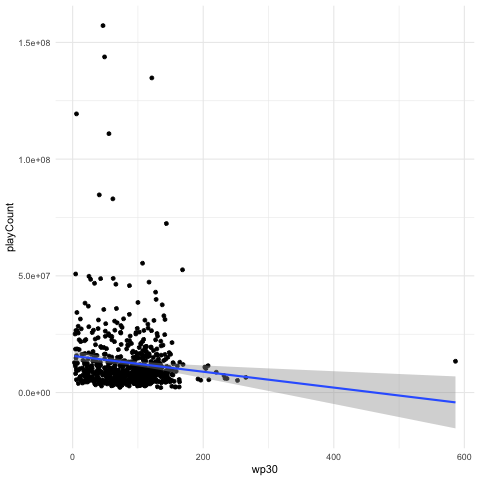

In [62]:
%%R

plt <- ggplot(df_2, aes(x=wp30, y=playCount)) + geom_point() + geom_smooth(method = 'lm') + theme_minimal()
print(plt)

model <- lm(playCount ~ wp30, data=df_2)
summary(model)

In [64]:
%%R

model <- lm(commentCount ~ wp30, data=df_2)
summary(model)


Call:
lm(formula = commentCount ~ wp30, data = df_2)

Residuals:
   Min     1Q Median     3Q    Max 
 -6853  -3710  -2403    205  88541 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7231.575    682.822  10.591  < 2e-16 ***
wp30         -20.658      6.837  -3.022  0.00261 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8521 on 686 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.01313,	Adjusted R-squared:  

0.0117 
F-statistic:  9.13 on 1 and 686 DF,  p-value: 0.002608



In [65]:
%%R

model <- lm(shareCount ~ wp30, data=df_2)
summary(model)


Call:
lm(formula = shareCount ~ wp30, data = df_2)

Residuals:
   Min     1Q Median     3Q    Max 
-61923 -45203 -30218   4022 868524 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 64409.21    8164.94   7.889 1.21e-14 ***
wp30          -99.57      81.75  -1.218    0.224    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101900 on 686 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.002158,	Adjusted R-squared:  0.0007029 
F-statistic: 1.483 on 1 and 686 DF,  p-value: 0.2237



In [71]:
%%R

model <- lm(commentCount ~ wp30 + shareCount + followerCount + duration, data=df_2)
summary(model)


Call:
lm(formula = commentCount ~ wp30 + shareCount + followerCount + 
    duration, data = df_2)

Residuals:
   Min     1Q Median     3Q    Max 
-31404  -2398  -1263    523  71360 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.679e+03  6.791e+02   5.418 8.37e-08 ***
wp30          -1.561e+01  5.556e+00  -2.809  0.00511 ** 
shareCount     4.917e-02  2.611e-03  18.834  < 2e-16 ***
followerCount  3.036e-05  8.391e-05   0.362  0.71756    
duration       8.384e+00  8.044e+00   1.042  0.29766    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6912 on 683 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.3535,	Adjusted R-squared:  0.3498 
F-statistic: 93.38 on 4 and 683 DF,  p-value: < 2.2e-16



In [72]:
%%R

model <- lm(shareCount ~ wp30 + commentCount + followerCount + duration, data=df_2)
summary(model)


Call:
lm(formula = shareCount ~ wp30 + commentCount + followerCount + 
    duration, data = df_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-280432  -27345  -14165   11557  697990 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.194e+04  8.204e+03   2.674  0.00767 ** 
wp30           4.704e+01  6.642e+01   0.708  0.47905    
commentCount   6.952e+00  3.691e-01  18.834  < 2e-16 ***
followerCount -2.871e-03  9.917e-04  -2.895  0.00391 ** 
duration      -6.377e+01  9.569e+01  -0.666  0.50538    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 82190 on 683 degrees of freedom
  (18 observations deleted due to missingness)
Multiple R-squared:  0.3537,	Adjusted R-squared:  0.3499 
F-statistic: 93.44 on 4 and 683 DF,  p-value: < 2.2e-16



In [73]:
df_sam = pd.read_csv("samshan_final_data.csv")

In [74]:
df_sam.head()

,filename,duration,transcription,id,wpm,wp30,author,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,uniqueId,nickname,authorId
0,tiktoks/sam.shan.shops/7366669769904246022_sam...,25,NaN,7366669769904246022,0.000000,0.000000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,1715186468,Fridge snack drawer restock (my kids fav time ...,NaN,"{'collectCount': 4258, 'commentCount': 110, 'd...","{'collectCount': '4258', 'commentCount': '110'...",4258.0,110.0,62200.0,790900.0,1162.0,sam.shan.shops,Sam Shan Shops 🦋,7111786018798552070
1,tiktoks/sam.shan.shops/7366278803896700165_sam...,15,Must have Amazon Home Find. This AI robot can...,7366278803896700165,176.000000,88.000000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,1715095438,Best home find for your pet 🐕🐾 #amazonhomefind...,NaN,"{'collectCount': 3247, 'commentCount': 52, 'di...","{'collectCount': '3247', 'commentCount': '52',...",3247.0,52.0,17200.0,415200.0,6122.0,sam.shan.shops,Sam Shan Shops 🦋,7111786018798552070
2,tiktoks/sam.shan.shops/7368864661556530438_sam...,21,Thanks for watching!,7368864661556530438,8.571429,4.285714,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,1715697505,Grocery restock with the handiest personal sho...,NaN,"{'collectCount': 144200, 'commentCount': 6842,...","{'collectCount': '144238', 'commentCount': '68...",144200.0,6842.0,960200.0,22000000.0,206800.0,sam.shan.shops,Sam Shan Shops 🦋,7111786018798552070
3,tiktoks/sam.shan.shops/7355977855655759110_sam...,20,Thanks for watching!,7355977855655759110,9.000000,4.500000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,1712697061,Restock my stanley for lunch time 🍣🥤 #stanleyc...,NaN,"{'collectCount': 15000, 'commentCount': 1399, ...","{'collectCount': '15031', 'commentCount': '139...",15000.0,1399.0,266900.0,7000000.0,35600.0,sam.shan.shops,Sam Shan Shops 🦋,7111786018798552070
4,tiktoks/sam.shan.shops/7373826457782455558_sam...,41,Thanks for watching!,7373826457782455558,4.390244,2.195122,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,1716852765,Snack Drawer Restock 🍪 #snackdrawer #restock #...,NaN,"{'collectCount': 3032, 'commentCount': 126, 'd...","{'collectCount': '3032', 'commentCount': '126'...",3032.0,126.0,37800.0,535500.0,984.0,sam.shan.shops,Sam Shan Shops 🦋,7111786018798552070


In [75]:
%%R -i df_sam

df_sam <- df_sam

In [78]:
%%R 

model <- lm(playCount ~ wp30 + commentCount + shareCount + duration, data=df_sam)
summary(model)


Call:
lm(formula = playCount ~ wp30 + commentCount + shareCount + duration, 
    data = df_sam)

Residuals:
     Min       1Q   Median       3Q      Max 
-3339414  -542548  -227445   528241  2141259 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.657e+06  7.073e+05   2.343   0.0277 *  
wp30         -1.005e+04  6.225e+03  -1.615   0.1194    
commentCount  2.122e+03  2.163e+02   9.814 7.09e-10 ***
shareCount    2.086e+01  3.857e+00   5.410 1.48e-05 ***
duration     -2.326e+04  2.456e+04  -0.947   0.3529    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1168000 on 24 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9649 
F-statistic: 193.3 on 4 and 24 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = playCount ~ wp30, data = df_sam)

Residuals:
     Min       1Q   Median       3Q      Max 
-6215771 -3189292  -619659   811237 19133871 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6487174    1549535   4.187  0.00027 ***
wp30          -66314      26104  -2.540  0.01714 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5701000 on 27 degrees of freedom
Multiple R-squared:  0.1929,	Adjusted R-squared:  0.163 
F-statistic: 6.453 on 1 and 27 DF,  p-value: 0.01714



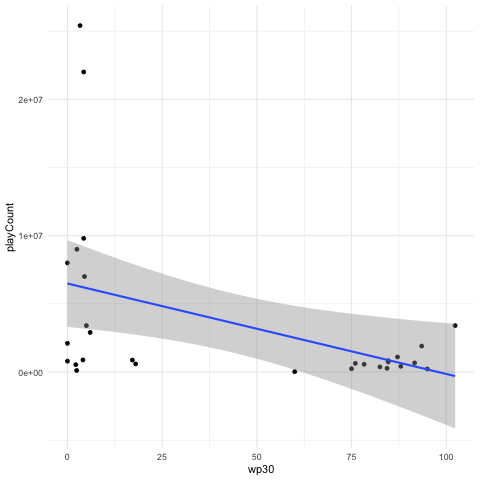

In [80]:
%%R 

plt <- ggplot(df_sam, aes(x=wp30, y=playCount)) + geom_point() + geom_smooth(method = 'lm') + theme_minimal()
print(plt)

model <- lm(playCount ~ wp30, data=df_sam)
summary(model)